In [121]:
import os
import csv

data_dir = 'C:/Users/dk866/Desktop/monitoring_system/Data/test_17_gearhead/'
fan =  []
for file in os.listdir(data_dir):
    reader = csv.reader(open(os.path.join(data_dir, file), 'r'), delimiter=',')
    for data in reader:
        fan.extend(list(map(float, data)))
    # print(len(data))

In [124]:
len(fan) // 17066

1452

In [123]:
test = []
for file in os.listdir('C:/Users/dk866/Desktop/monitoring_system/Data/nothing_90/'):
    reader = csv.reader(open(os.path.join('C:/Users/dk866/Desktop/monitoring_system/Data/nothing_90/', '2023.5.4.9.35.12.46'), 'r'), delimiter=',')
    for data in reader:
        test.extend(list(map(float, data)))

len(test)

6111208

In [83]:
len(test) // 25600

238

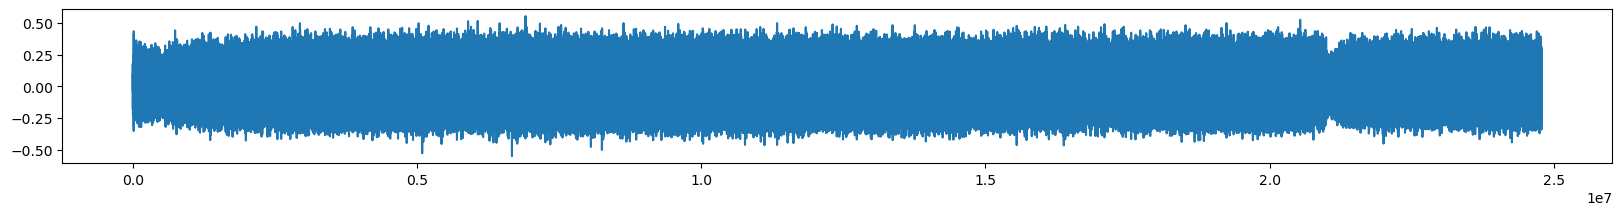

In [125]:
plt.figure(figsize=[20, 2])
plt.plot(fan)

In [126]:
len(fan) //17066

1452

In [57]:
240 * 25600

6144000

In [142]:
import numpy as np

signal = []
W

In [139]:
import numpy as np

one_min = []
for i in range(238):
    one_min.append(test[i * 25600 : (i + 1) * 25600])

In [128]:
len(signal)

1452

In [79]:
len(one_min[-1])

25600

In [168]:
import scipy
import pandas as pd 

mean = [] # 평균
rms = [] # 분산제곱평균
abs_mean = [] # 절대값 평균
entropy = [] # 엔트로피
kurtosis = [] # 첨도
skew = [] # 왜도

for l in signal:
    t0 = np.sqrt(sum(l) ** 2 / 17066)
    t1 = sum(l) / len(l)
    t2 = sum([abs(con) for con in l]) / len(l)
    t3 = scipy.stats.entropy(pd.cut(l, 500).value_counts())
    t4 = scipy.stats.kurtosis(l)
    t5 = scipy.stats.skew(l)

    rms.append(t0)
    mean.append(t1)
    abs_mean.append(t2)
    entropy.append(t3)
    kurtosis.append(t4)
    skew.append(t5)

In [85]:
rms1min = []
for l in one_min:
    temp = np.sqrt(sum(l) ** 2 / 25600)
    rms1min.append(temp)

In [130]:
len(rms)

1452

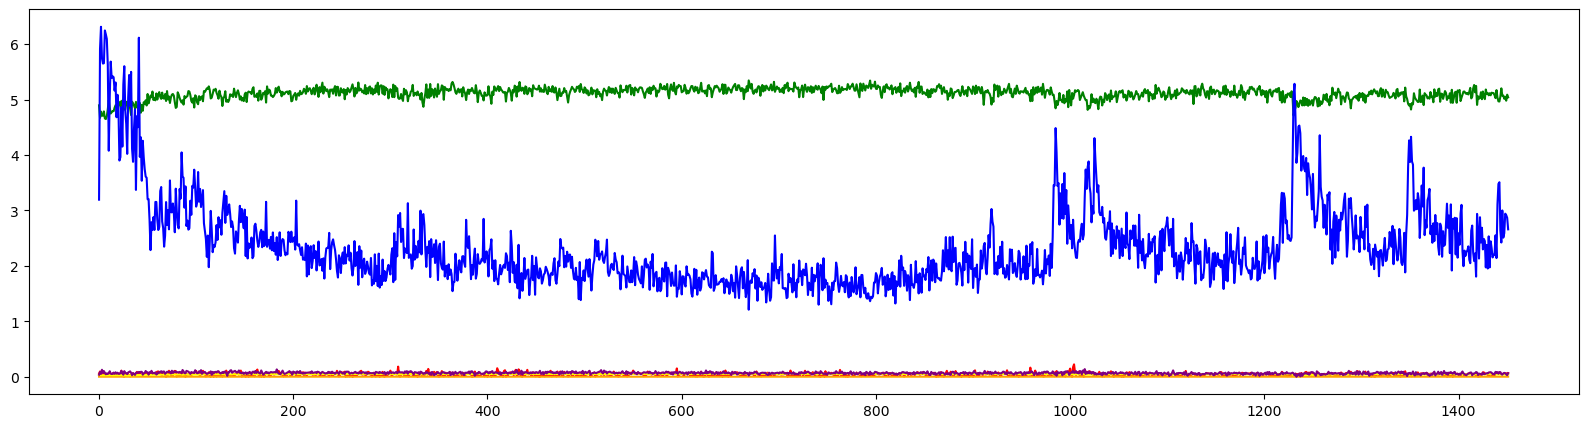

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 5])
plt.plot(rms, color='red')
plt.plot(mean, color='orange')
plt.plot(abs_mean, color='yellow')
plt.plot(entropy, color='green')
plt.plot(kurtosis, color='blue')
plt.plot(skew, color='purple')

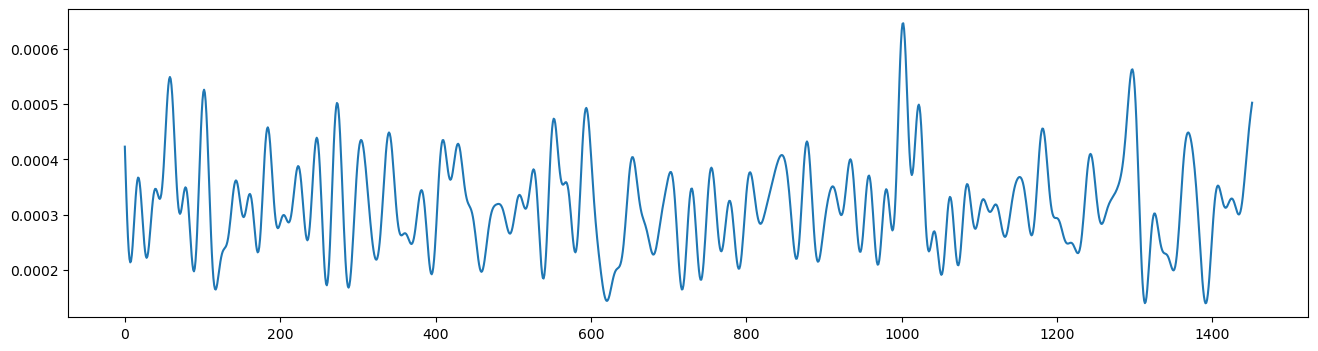

In [137]:
import numpy as np
from scipy import signal

np_rms = np.array(rms, dtype=np.float64)

N = 10
Wn = 0.1
B, A = signal.butter(N, Wn, output='ba')
tempf = signal.filtfilt(B, A, np_rms)
plt.figure(figsize=[16,4])
plt.plot(tempf)

In [115]:
from sklearn.preprocessing import Normalizer

stder = Normalizer()
np_rms = np.array(rms)
stder.fit_transform(np_rms.reshape(1, -1))
scaled_rms = stder.transform(np_rms.reshape(1, -1))

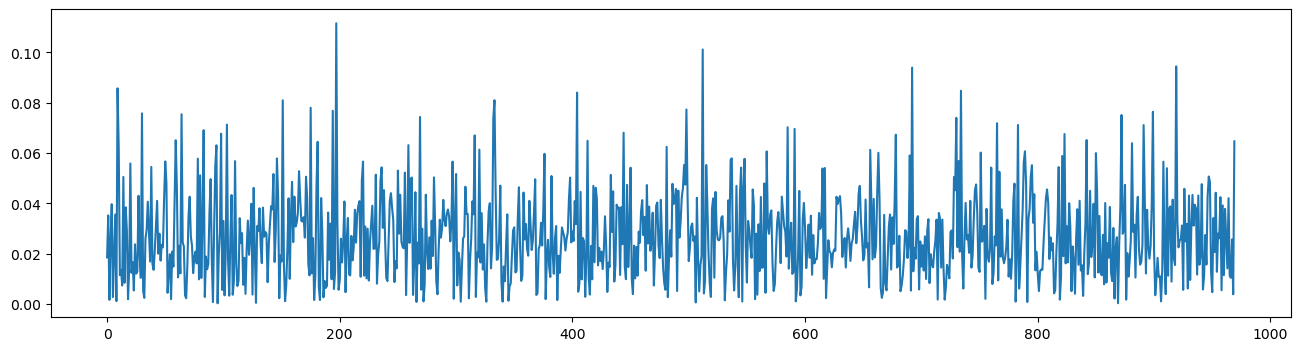

In [117]:
plt.figure(figsize=[16,4])
plt.plot(scaled_rms[0])

In [104]:
import pandas as pd
df = pd.DataFrame(scaled_rms[0])

In [105]:
df.to_csv('../bearing_test/data/15min_custom_rms.csv')

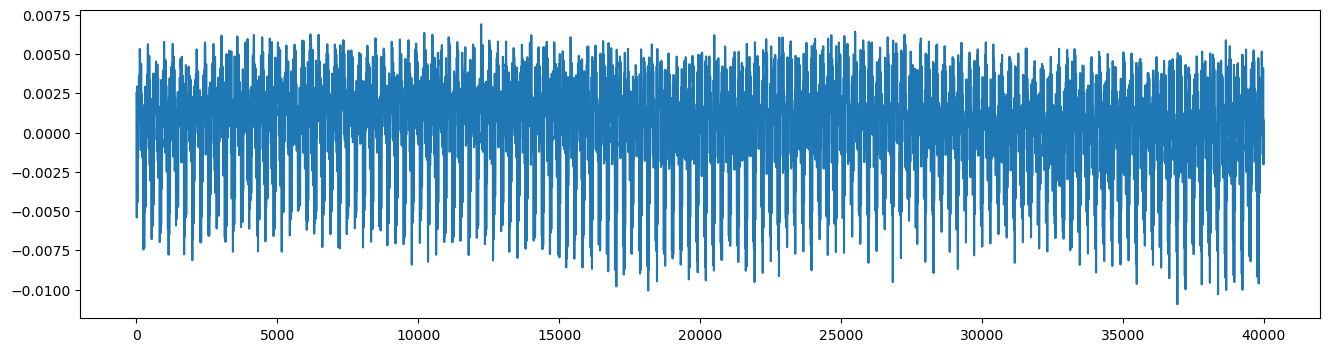

In [120]:
import numpy as np
from scipy import signal

np_fan = np.array(fan, dtype=np.float64)

N = 10
Wn = 0.1
B, A = signal.butter(N, Wn, output='ba')
tempf = signal.filtfilt(B, A, np_fan)
plt.figure(figsize=[16,4])
plt.plot(tempf[60000:100000])


In [ ]:
len(tempf)

In [ ]:
import csv, os

path = "C:/Users/dk866/Desktop/monitoring_system/Data/0510/"

signal = []
for filename in os.listdir(path):
    w_f = open(path + filename, 'r')
    reader = csv.reader(w_f)
    for row in reader:
        signal.extend(list(map(float, row)))

In [ ]:
import numpy as np
import csv, os

path = "C:/Users/dk866/Desktop/monitoring_system/Data/0512/"

rms_signal = []
last = 0

for filename in os.listdir(path):
    w_f = open(path + filename, 'r')
    reader = csv.reader(w_f)
    for row in reader:
        row = np.array(list(map(float, row)))
        rms = []
        window = 10
        # temp = np.sqrt(sum(row ** 2) / len(row))
        for i in range(1, len(row) // (len(row) // window)):
            temp = np.sqrt(sum(row[last: i * (len(row) // window)] ** 2) / (len(row) // window))
            if temp != 0: rms.append(temp)
            last = i * (len(row) // window)
        rms_signal.extend(rms)

# df = pd.DataFrame()
# df['signal'] = signal

In [ ]:
len(rms_signal)

In [ ]:
w = csv.writer(open('./Data/25_rms_nothing.csv', 'w'))
w.writerow(rms_signal)

In [ ]:
reader = csv.reader(open('./Data/25_rms_nothing.csv', 'r'))
for r in reader:
    print(len(r))

In [ ]:
rms_signal[9]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 4])
plt.plot(rms_signal)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[16, 4])
plt.plot(rms_signal)
plt.show()